# Olympics Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from matplotlib import gridspec
%matplotlib inline

In [2]:
df1 = pd.read_csv(r"C:\Users\Medhavi\Desktop\kaggle\olympic\athlete_events.csv")
df2 = pd.read_csv(r"C:\Users\Medhavi\Desktop\kaggle\olympic\noc_regions.csv")

In [3]:
df1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df1.shape

(271116, 15)

In [5]:
df2.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [6]:
df2.shape

(230, 3)

In [7]:
# merging both the tables
df = pd.merge(df1, df2, on='NOC')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [8]:
df = df.drop(['ID', 'Games', 'Event', 'notes'], axis='columns')

In [9]:
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Medal,region
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,NaN,China
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,NaN,China
2,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000,Summer,Sydney,Boxing,NaN,China
3,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004,Summer,Athina,Wrestling,NaN,China
4,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016,Summer,Rio de Janeiro,Swimming,NaN,China


Text(0.5, 1.0, 'Male v/s Female participation')

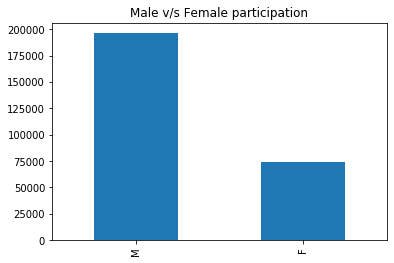

In [10]:
# Determining the number of participants with respect to sex.

df.Sex.value_counts().plot(kind='bar')
plt.title("Male v/s Female participation")

It appears that more men have participated in Olympics than women between 1896 to 2016 as per data.

Text(0, 0.5, 'No. of participants')

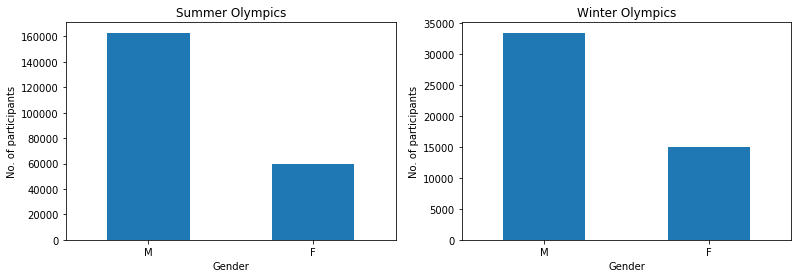

In [11]:
plt.figure(figsize=[13,4])
plt.subplot(1, 2, 1)
df[df.Season == 'Summer'].Sex.value_counts().plot(kind='bar')
plt.title("Summer Olympics")
plt.xlabel("Gender")
plt.xticks(rotation = 0)
plt.ylabel("No. of participants")
plt.subplot(1, 2, 2)
df[df.Season == 'Winter'].Sex.value_counts().plot(kind='bar')
plt.title("Winter Olympics")
plt.xlabel("Gender")
plt.xticks(rotation = 0)
plt.ylabel("No. of participants")

We can clearly observe that the Summer Olympics has seen more number of participants than the Winter Olympics, but the number of male participants remain higher in both the cases.

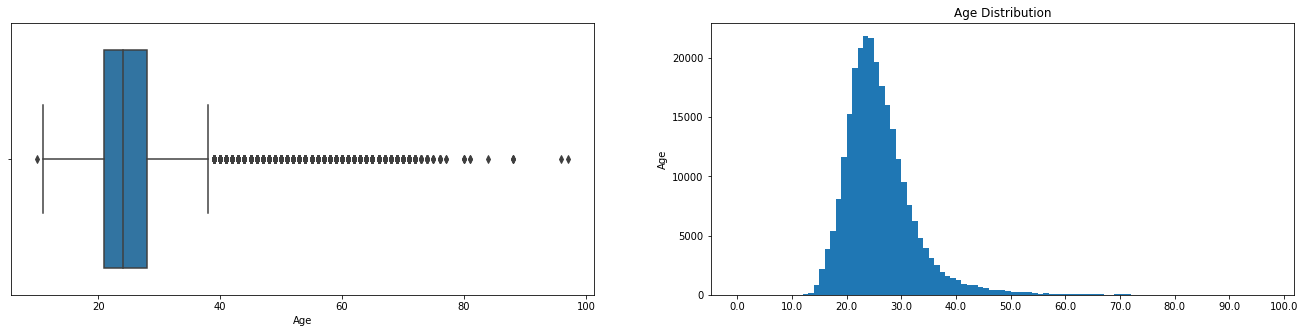

In [12]:
# Determining the Age distribution of players.

fig = plt.figure(figsize=[23,5])
plt.subplot(1, 2, 2)
b=np.arange(0,df.Age.max()+1,1)
plt.hist(data=df,x='Age',bins=b)
t=np.arange(0,df.Age.max()+10,10)
plt.xticks(t,t)
plt.title('Age Distribution')
plt.ylabel('Frequency')
plt.ylabel('Age')
plt.subplot(1, 2, 1)
sns.boxplot(df.Age)

From the histogram, it is observed that majority of participants are between 20 and 30 years of age. Though some players are young having an age of 10-15 years while others are quite older with age between 40 and 80 years.

In [13]:
df[df.Age > 60].Sport.unique()

array(['Art Competitions', 'Equestrianism', 'Fencing', 'Archery', 'Roque',
       'Shooting', 'Sailing'], dtype=object)

Sports played by some olders players require comparitively less physical work.

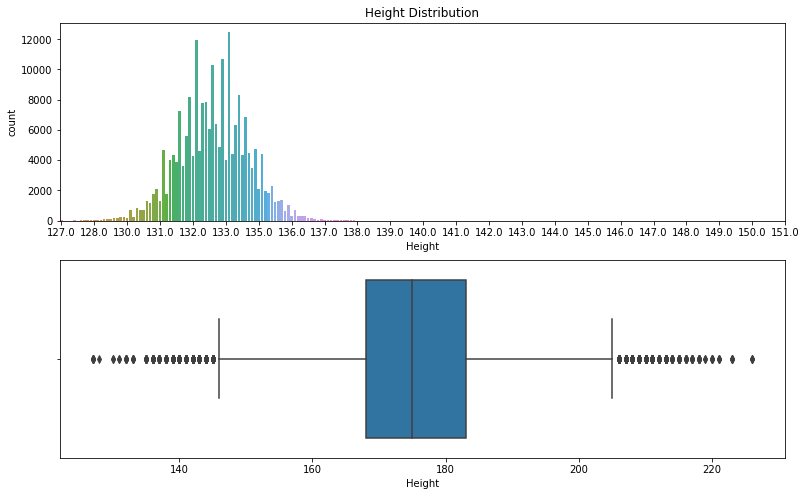

In [14]:
# Determining the Height distribution of players.

fig = plt.figure(figsize=[13,8])
plt.subplot(2, 1, 1)
plt.title('Height Distribution')
sns.countplot(data=df,x='Height')
plt.xticks(np.arange(0, max(df.Height), step=10))
plt.subplot(2, 1, 2)
sns.boxplot(df.Height)

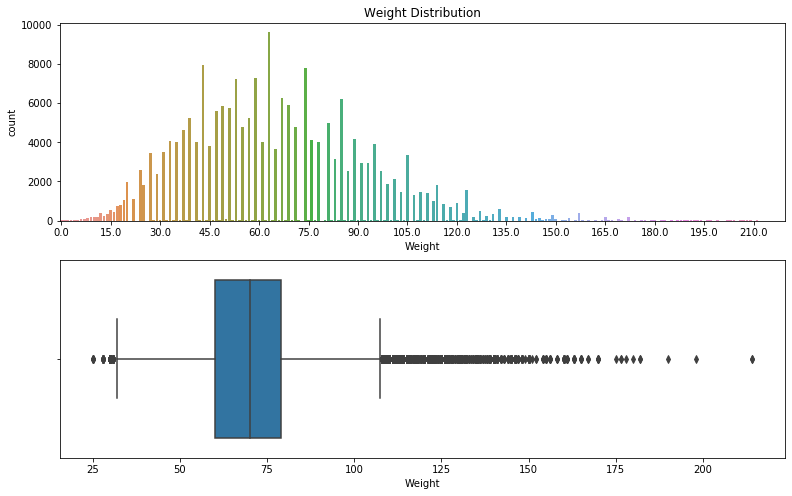

In [15]:
# Deteremining the Weight distribution.

fig = plt.figure(figsize=[13,8])
plt.subplot(2, 1, 1)
plt.title('Weight Distribution')
sns.countplot(data=df,x='Weight')
plt.xticks(np.arange(0, max(df.Weight), step=15), np.arange(0, max(df.Weight), step=15))
plt.subplot(2, 1, 2)
sns.boxplot(df.Weight)

In [16]:
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Medal,region
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,NaN,China
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,NaN,China
2,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000,Summer,Sydney,Boxing,NaN,China
3,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004,Summer,Athina,Wrestling,NaN,China
4,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016,Summer,Rio de Janeiro,Swimming,NaN,China


In [17]:
city_count = df.City.value_counts()
order1 = city_count.sort_values(ascending=False)

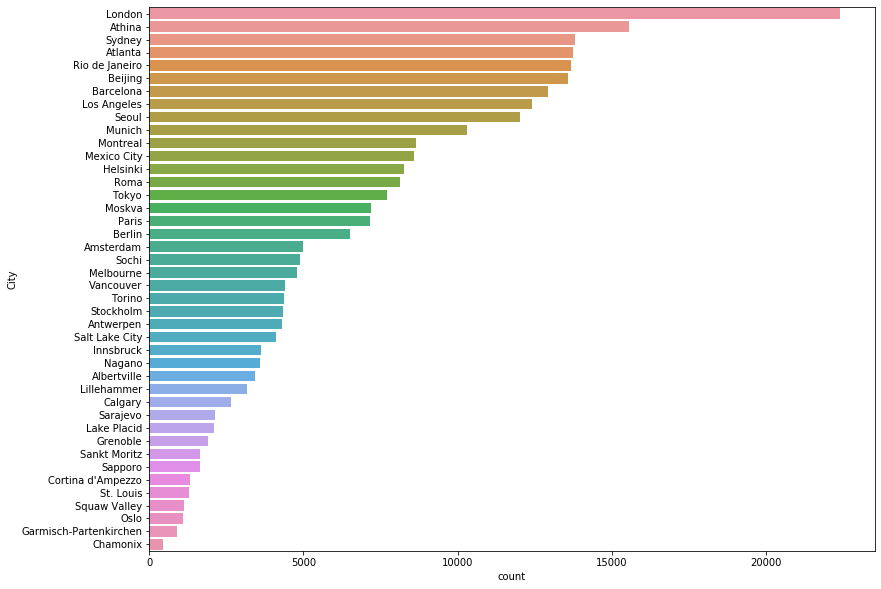

In [18]:
fig = plt.figure(figsize=[13,10])
sns.countplot(y = df.City, order=df.groupby("City").size().sort_values(ascending=False).index)

The above graph is used to show the number of participants from different regions over the years sorted in descending order. It clearly shows that maximum players came from London which is more than 20,000 followed by Athina which is close to 15,000 and so on.

In [19]:
gold_medal = df[df.Medal == "Gold"]
silver_medal = df[df.Medal == "Silver"]
bronze_medal = df[df.Medal == "Bronze"]

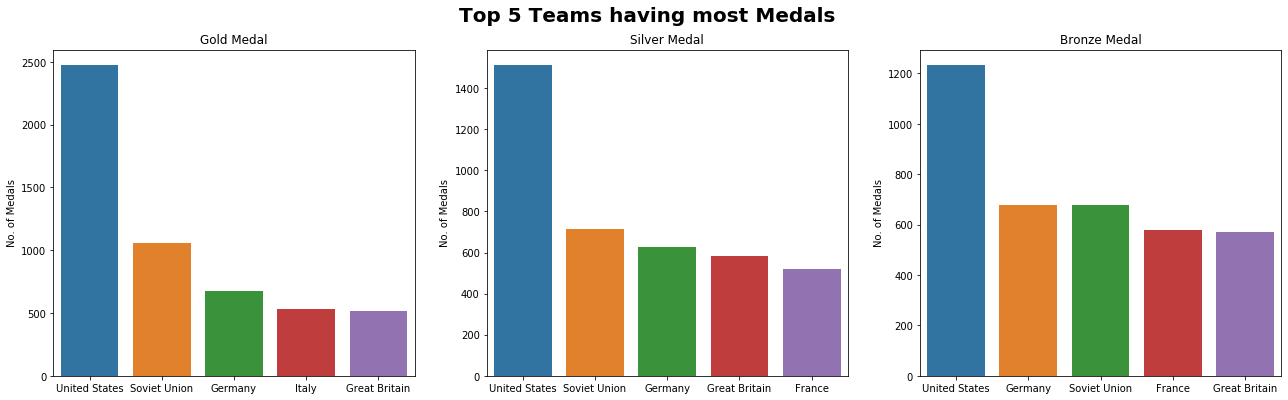

In [20]:
fig = plt.figure(figsize=[22,6])
fig.suptitle("Top 5 Teams having most Medals", fontsize=20, fontweight="bold")

plt.subplot(1, 3, 1)
plt.title("Gold Medal")
plt.ylabel("No. of Medals")
gold_count = gold_medal.Team.value_counts()[:5]
top5goldteam = gold_count.index
sns.barplot(x = top5goldteam, y = gold_count.values)

plt.subplot(1, 3, 2)
plt.title("Silver Medal")
plt.ylabel("No. of Medals")
silver_count = silver_medal.Team.value_counts()[:5]
top5silverteam = silver_count.index
sns.barplot(x = top5silverteam, y = silver_count.values)

plt.subplot(1, 3, 3)
plt.title("Bronze Medal")
plt.ylabel("No. of Medals")
bronze_count = bronze_medal.Team.value_counts()[:5]
top5bronzeteam = bronze_count.index
sns.barplot(x = top5bronzeteam, y = bronze_count.values)

The above graphs clearly shows the countries having most number of each type of medal i.e. gold, silver & bronze. The United States have most number of all the types of medals leaving other countries far behind. 

In [21]:
dh = df.groupby('Year').Name.count().head()

Text(0.5, 1.0, 'Frequency of players over the years')

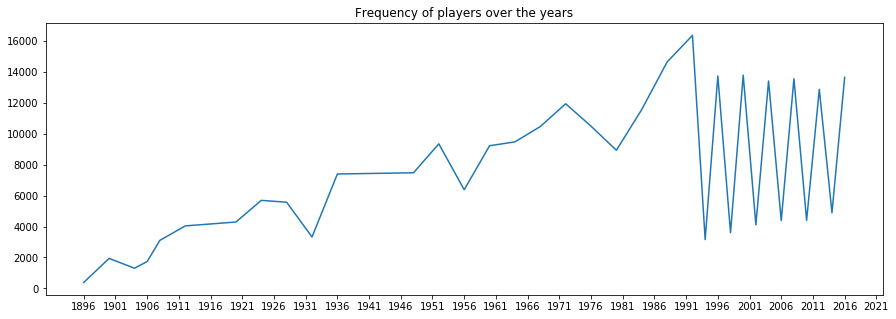

In [22]:
plt.figure(figsize=[15,5])
plt.xticks(np.arange(df.Year.min(), df.Year.max()+10, 5))
plt.plot(df.groupby('Year').Name.count())
plt.title('Frequency of players over the years')

In [23]:
di = df[df.Season == 'Winter']
di.Year.sort_values().unique()

array([1924, 1928, 1932, 1936, 1948, 1952, 1956, 1960, 1964, 1968, 1972,
       1976, 1980, 1984, 1988, 1992, 1994, 1998, 2002, 2006, 2010, 2014],
      dtype=int64)

Text(0.5, 1.0, 'Frequency of players in winter olympics over the years')

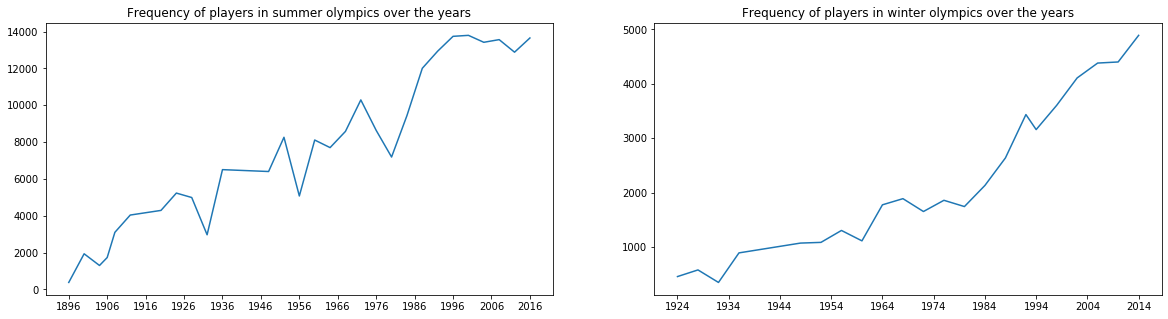

In [24]:
summer_olympics = df[df.Season == 'Summer']
winter_olympics = df[df.Season == 'Winter']

plt.figure(figsize=[20, 5])

plt.subplot(1, 2, 1)
plt.plot(summer_olympics.groupby('Year').Name.count())
plt.xticks(np.arange(summer_olympics.Year.min(), summer_olympics.Year.max()+10, 10))
plt.title('Frequency of players in summer olympics over the years')

plt.subplot(1, 2, 2)
plt.plot(winter_olympics.groupby('Year').Name.count())
plt.xticks(np.arange(winter_olympics.Year.min(), winter_olympics.Year.max()+10, 10))
plt.title('Frequency of players in winter olympics over the years')

It clearly shows that no matter what type of olympic it is, the number of participants are increasing over the years.